<a href="https://colab.research.google.com/github/gluoneros/greenPredEnergy/blob/main/ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final - TalentoTech**
### **Predicción de viabilidad de proyectos de energia renovable en Colombia**

> El proyecto fue realizado en el marco del curso de AI-ML TalentoTech

## **Descripcion** 🚀
_Este proyecto utiliza Python y Jupyter Notebook, pandas, numpy para el desarrollo del modelo de predicción de proyectos de energia renobable en los municipios de Colombia._

## **Tecnologías** 📗
_Se utilizan las siguientes tecnologias para el desarrollo del proyecto:_

* [ Python ](https://www.python.org/) -- <img height="20" src="https://cdn.simpleicons.org/python?viewbox=auto" />
* [Jupyter](https://jupyter.org/) -- <img height="20" src="https://cdn.simpleicons.org/jupyter?viewbox=auto" />
* [Pandas](https://pandas.pydata.org/) -- <img height="20" src="https://cdn.simpleicons.org/pandas?viewbox=auto" />
* [Numpy](https://numpy.org/) -- <img height="20" src="https://cdn.simpleicons.org/numpy?viewbox=auto" />
* [Scikit-learn](https://scikit-learn.org/stable/) -- <img height="20" src="https://cdn.simpleicons.org/scikitlearn?viewbox=auto" />
* [github](https://github.com) --<img height="20" src="https://cdn.simpleicons.org/github?viewbox=auto" />

## **Autores** 😊

* **Monica Garcia**
* **Juan Pablo Cardenas**
* **Juan Pablo Quevedo**
* **Hildebrando Vargas**
* **Jonathan Gutierrez**
* **Mary Luz Ceballosl**

## **Tareas**  ✒️

 - [Importar librerías necesarias](#Importar librerías necesarias)
 2. Cargar los Datos
 3. Explore y visualice los datos para obtener información.
 4. Prepare los datos para los algoritmos de machine learning.
 5. Generación de Estadísticas Descriptivas
 6. Visualización de datos utilizando gráficos de barras, histogramas y gráficos de dispersión
 7. Identificación y manejo de valores atípicos y tendencias en los datos
 8. Uso de técnicas como imputación de la media, mediana y regresión para completar datos faltantes.
 9. Eliminación de registros con datos faltantes o imputación de valores categóricos.
 10. Cálculo de la correlación entre variables.
 11. Aplicación de técnicas de reducción de dimensionalidad para reducir la dimensionalidad de los datos.
 12. Aplicación de PCA para reducir la dimensionalidad de datasets
 13. Aplicación de técnicas de regresión para predecir valores de variables.
 14. Ajusta tu modelo.
 15. Presente su solución.
 16. Inicie, supervise y mantenga su sistema.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Importar librerías necesarias

In [2]:
# importaciones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# check modelos
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
# check escaladores
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer
# normalización
import unicodedata
# clientes
!pip install sodapy
from sodapy import Socrata
client = Socrata("www.datos.gov.co", None)

### Métodos

In [3]:
def removeAccents(_value):
  value = _value.upper().replace("Ñ", "%")
  value = unicodedata.normalize("NFKD", value).encode("ascii","ignore").decode("ascii").replace("%", "Ñ")
  return value

## DataSet 1 | Estado de la prestación del servicio de energía en Zonas No Interconectadas

#### Predecir basados en 	'energia_activa',	'energia_reactiva', 'potencia_maxima' 'prom_diario_horas' [Ver](https://www.datos.gov.co/Minas-y-Energ-a/Estado-de-la-prestaci-n-del-servicio-de-energ-a-en/3ebi-d83g/about_data)
##### cual sería el día de demanda maxima para que una localidad en una zona no interconectada limitara y optimizara su uso de energía en funcion del posible ahorro de esta.Y los habitantes en sus viviendas emplearan con anticipacion dichas disminusiones en el consumo energético gracias al día de demanda maxima predicho.

In [4]:
d_zni_ = client.get("3ebi-d83g", limit=5000)
d_zni = pd.DataFrame.from_records(d_zni_)
d_zni = d_zni.rename(columns={"mpio": "municipio"})
d_zni

,id_dpto,dpto,id_mpio,municipio,id_localidad,localidad,anio,mes,energia_activa,energia_reactiva,potencia_maxima,dia_demanda_maxima,fecha_demanda_maxima,prom_diario_horas
0,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,05,132215,41907,286.4,Jueves,2024-05-23T18:00:00.000,24
1,91,AMAZONAS,91798,TARAPACA (ANM),91798000,TARAPACA (TARAPACA (ANM) - AMAZONAS),2024,05,28132,12662,102.6,Viernes,2024-05-03T18:30:00.000,10.16
2,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873010,LA PLAYA MURRI (VIGÍA DEL FUERTE - ANTIOQUIA),2024,05,2686,1110,27.46,Martes,2024-05-21T19:45:00.000,4.19
3,88,ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,05,1331271,284638,2190.28,Viernes,2024-05-10T15:00:00.000,23.59
4,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,13001007,ISLA FUERTE (CARTAGENA DE INDIAS - BOLÍVAR),2024,05,64368,30561,247.59,Sábado,2024-05-18T22:00:00.000,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,76,VALLE DEL CAUCA,76109,BUENAVENTURA,76109032,SAN FRANCISCO NAYA (BUENAVENTURA - VALLE DEL C...,2024,08,7610,3285,31.23,Viernes,2024-08-02T19:15:00.000,10.05
4269,97,VAUPÉS,97161,CARURÚ,97161000,CARURÚ (CARURÚ - VAUPÉS),2024,08,31775,7881,87.82,Jueves,2024-08-29T18:45:00.000,16.39
4270,97,VAUPÉS,97001,MITÚ,97001000,MITÚ (MITÚ - VAUPÉS),2024,08,1590470,387197,3236.71,Miércoles,2024-08-21T13:00:00.000,23.56
4271,97,VAUPÉS,97666,TARAIRA,97666000,TARAIRA (TARAIRA - VAUPÉS),2024,08,39226,10719,136.84,Martes,2024-08-20T12:00:00.000,13.01


In [5]:
# d_zni.describe()
d_zni_min = d_zni[['municipio', 'anio', 'mes', 'energia_activa', 'energia_reactiva', 'potencia_maxima', 'prom_diario_horas']]
d_zni_min['energia_activa'] = round(d_zni_min[['energia_activa']].replace('NaN', pd.NA).fillna(0).astype(int))
d_zni_min['energia_reactiva'] = round(d_zni_min[['energia_reactiva']].replace('NaN', pd.NA).fillna(0).astype(float))
d_zni_min["municipio"] = d_zni_min["municipio"].apply(removeAccents)
d_zni_min = d_zni_min.groupby(["municipio"])[["energia_activa", "energia_reactiva"]].median()
d_zni_min

<ipython-input-5-3e25d94e10e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_zni_min['energia_activa'] = round(d_zni_min[['energia_activa']].replace('NaN', pd.NA).fillna(0).astype(int))
<ipython-input-5-3e25d94e10e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_zni_min['energia_reactiva'] = round(d_zni_min[['energia_reactiva']].replace('NaN', pd.NA).fillna(0).astype(float))
<ipython-input-5-3e25d94e10e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,energia_activa,energia_reactiva
municipio,,
ACANDI,388026.0,142002.0
ALTO BAUDO,52554.0,18043.0
ALTO BAUDO (PIE DE PATO),46655.0,14585.0
BAHIA SOLANO,187949.0,68362.0
BAHIA SOLANO (MUTIS),150660.0,64680.0
...,...,...
TRINIDAD,12834.5,7221.5
TUMACO,14829.5,5409.5
UNGUIA,20480.0,8206.0


## DataSet2 | Energía renovable en Colombia
##### Utilizando 'Empleos_estimado',	'Usuarios', 'inversion,	'Capacidad_instalada, 'Energía' predecir cual sería un incremento significativo de desempeño de un proyecto Eolico y/o Solar a futuro para continuar invertiendo en el. [Ver](https://www.datos.gov.co/Minas-y-Energ-a/Meta-FNCER-Incorporar-en-la-matriz-energ-tica-nuev/vy9n-w6hc/about_data)

In [6]:
d_proj_ = client.get("vy9n-w6hc", limit=3000)
d_proj = pd.DataFrame.from_records(d_proj_)
d_proj = d_proj.rename(columns={"municipio": "municipio"})
d_proj

,proyecto,tipo,capacidad,departamento,municipio,codigo_departamento,codigo_municipio,fecha_estimada_fpo,energia_kwh_d_a,usuarios,inversi_n_estimada_cop,empleos_estimados,emisiones_co2_ton_a_o
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.8,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.0,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
4,SOLAR CASTILLA ECP,Solar,20.0,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,BUGA 1 PARTE 2,Solar,5.94,VALLE DEL CAUCA,"""""",76,76,2022-12-31T00:00:00.000,28512,4944,22275000000,41,8326
154,BUGA 1 PARTE 1,Solar,3.96,VALLE DEL CAUCA,"""""",76,76,2022-07-31T00:00:00.000,19008,3296,14850000000,28,5550
155,REFINERÍA GRB,Solar,21.0,SANTANDER,BARRANCABERMEJA,68,68081,2023-12-31T00:00:00.000,100800,17480,78750000000,146,29434
156,EMSA GD Y AG (34 Proyectos),Solar,1.9,META,VILLAVICENCIO,50,50001,2022-05-31T00:00:00.000,9120,1582,8170000000,13,2663


In [7]:
d_proj.describe()

,proyecto,tipo,capacidad,departamento,municipio,codigo_departamento,codigo_municipio,fecha_estimada_fpo,energia_kwh_d_a,usuarios,inversi_n_estimada_cop,empleos_estimados,emisiones_co2_ton_a_o
count,158,158,158,158,158,158,158,158,158,158,158,158,158
unique,156,2,104,26,79,26,81,70,106,106,112,75,106
top,DULIMA PARTE 2,Solar,9.9,VALLE DEL CAUCA,URIBIA,76,44847,2022-05-31T00:00:00.000,47520,8240,37125000000,69,13876
freq,2,145,23,17,8,17,8,15,22,22,14,22,22


## DataSet 3 | Energía Per capita en Colombia

In [8]:
d_epc = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/refs/heads/master/owid-energy-data.csv')
d_epc

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21807,Zimbabwe,2019,ZWE,15354606.0,2.514642e+10,NaN,NaN,NaN,NaN,12.374,...,0.353,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21808,Zimbabwe,2020,ZWE,15669663.0,2.317871e+10,NaN,NaN,NaN,NaN,6.382,...,0.298,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21809,Zimbabwe,2021,ZWE,15993525.0,2.514009e+10,NaN,NaN,NaN,NaN,0.000,...,0.236,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21810,Zimbabwe,2022,ZWE,16320539.0,2.590159e+10,NaN,NaN,NaN,NaN,6.127,...,0.336,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


## d_ndll - DataSet 4 | No días Lluvia


In [9]:
d_ndll = pd.read_csv('https://raw.githubusercontent.com/gluoneros/talentoTech/refs/heads/main/noDiasLLuvia.csv')
d_ndll = d_ndll.rename(columns={"MUNICIPIO": "municipio"})
d_ndll['municipio'] = d_ndll['municipio'].str.upper()
d_ndll

,CODIGO,CATEGORIA,ESTACIÓN,municipio,DEPARTAMENTO,AO,ALTITUD (m),LONGITUD,LATITUD,ENE,...,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL,Número de meses,% de cumplimiento
0,47067010,LM,El Encanto,EL ENCANTO,Amazonas,7,120,"-73,20","-1,77","14,3",...,"18,8","17,7","13,4","13,3","13,9","14,8","16,4","191,7",332,"92,2%"
1,47060010,PM,El Encato,EL ENCANTO,Amazonas,7,120,"-73,21","-1,75","14,3",...,"18,6","17,8","13,1","13,3","13,8","14,9","16,3","191,1",343,"95,3%"
2,44187030,LM,Bacuri,LA PEDRERA,Amazonas,4,101,"-69,47","-1,23","19,0",...,"20,3","19,6","16,5","14,5","15,1","15,0","18,8","216,0",343,"95,3%"
3,44187020,PM,La Pedrera,LA PEDRERA,Amazonas,4,102,"-69,59","-1,31","13,8",...,"14,7","13,5","12,4","11,2","12,0","12,1","13,3","161,8",334,"92,8%"
4,44157040,LM,Manacaro,LA PEDRERA,Amazonas,4,109,"-70,18","-1,53","18,3",...,"19,1","18,0","14,6","13,2","14,9","14,8","17,1","204,0",351,"97,5%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,38015030,SP,Aeropuerto Puerto Carreño,PUERTO CARREÑO,Vichada,3,57,"-67,49","6,18","1,0",...,"21,2","21,9","19,7","14,3","12,3","7,9","2,9","133,2",359,"99,7%"
1441,38017040,LM,Casuarito,PUERTO CARREÑO,Vichada,3,65,"-67,64","5,68","2,1",...,"19,3","19,6","16,1","12,7","10,3","7,7","4,3","130,7",343,"95,3%"
1442,35260010,PM,Bonanza,SANTA ROSALÍA,Vichada,3,112,"-70,85","5,14","1,1",...,"14,4","15,1","13,2","10,0","8,9","5,9","2,7","98,7",324,"90,0%"
1443,35260030,PM,Hato Burrunay,SANTA ROSALÍA,Vichada,3,106,"-70,68","5,35","1,3",...,"15,3","17,1","14,0","12,1","10,8","7,7","3,6","113,4",349,"96,9%"


In [10]:
# d_ndll.describe()
d_ndll_min = d_ndll[['municipio', 'ANUAL', 'ALTITUD (m)', 'LATITUD', 'LONGITUD']]
d_ndll_min = d_ndll_min.rename(columns={"ANUAL": "días_lluvia_año"})
d_ndll_min = d_ndll_min.rename(columns={"ALTITUD (m)": "altitud_m"})
d_ndll_min = d_ndll_min.rename(columns={"LATITUD": "latitud"})
d_ndll_min = d_ndll_min.rename(columns={"LONGITUD": "longitud"})


d_ndll_min

,municipio,días_lluvia_año,altitud_m,latitud,longitud
0,EL ENCANTO,"191,7",120,"-1,77","-73,20"
1,EL ENCANTO,"191,1",120,"-1,75","-73,21"
2,LA PEDRERA,"216,0",101,"-1,23","-69,47"
3,LA PEDRERA,"161,8",102,"-1,31","-69,59"
4,LA PEDRERA,"204,0",109,"-1,53","-70,18"
...,...,...,...,...,...
1440,PUERTO CARREÑO,"133,2",57,"6,18","-67,49"
1441,PUERTO CARREÑO,"130,7",65,"5,68","-67,64"
1442,SANTA ROSALÍA,"98,7",112,"5,14","-70,85"
1443,SANTA ROSALÍA,"113,4",106,"5,35","-70,68"


In [11]:
d_ndll_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   municipio        1445 non-null   object
 1   días_lluvia_año  1445 non-null   object
 2   altitud_m        1445 non-null   int64 
 3   latitud          1445 non-null   object
 4   longitud         1445 non-null   object
dtypes: int64(1), object(4)
memory usage: 56.6+ KB


In [12]:
 # elimina espacios en blanco
d_ndll_min['días_lluvia_año'] = d_ndll_min['días_lluvia_año'].str.strip()
d_ndll_min['longitud'] = d_ndll_min['longitud'].str.strip()
d_ndll_min['latitud'] = d_ndll_min['latitud'].str.strip()
#d_ndll_min['ALTITUD (m)'] = d_ndll_min['ALTITUD (m)'].str.strip()

In [13]:
# Cambia comas por puntos en el campo
d_ndll_min['días_lluvia_año'] = d_ndll_min['días_lluvia_año'].str.replace(',', '.', regex=False)
d_ndll_min['longitud'] = d_ndll_min['longitud'].str.replace(',', '.', regex=False)
d_ndll_min['latitud'] = d_ndll_min['latitud'].str.replace(',', '.', regex=False)
d_ndll_min

,municipio,días_lluvia_año,altitud_m,latitud,longitud
0,EL ENCANTO,191.7,120,-1.77,-73.20
1,EL ENCANTO,191.1,120,-1.75,-73.21
2,LA PEDRERA,216.0,101,-1.23,-69.47
3,LA PEDRERA,161.8,102,-1.31,-69.59
4,LA PEDRERA,204.0,109,-1.53,-70.18
...,...,...,...,...,...
1440,PUERTO CARREÑO,133.2,57,6.18,-67.49
1441,PUERTO CARREÑO,130.7,65,5.68,-67.64
1442,SANTA ROSALÍA,98.7,112,5.14,-70.85
1443,SANTA ROSALÍA,113.4,106,5.35,-70.68


In [14]:
d_ndll_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   municipio        1445 non-null   object
 1   días_lluvia_año  1445 non-null   object
 2   altitud_m        1445 non-null   int64 
 3   latitud          1445 non-null   object
 4   longitud         1445 non-null   object
dtypes: int64(1), object(4)
memory usage: 56.6+ KB


In [15]:
# conversion a numerico
d_ndll_min['días_lluvia_año'] = pd.to_numeric(d_ndll_min['días_lluvia_año'], errors='coerce')
d_ndll_min['latitud'] = pd.to_numeric(d_ndll_min['latitud'], errors='coerce')
d_ndll_min['longitud'] = pd.to_numeric(d_ndll_min['longitud'], errors='coerce')

In [16]:
d_ndll_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   municipio        1445 non-null   object 
 1   días_lluvia_año  1445 non-null   float64
 2   altitud_m        1445 non-null   int64  
 3   latitud          1445 non-null   float64
 4   longitud         1445 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 56.6+ KB


In [17]:
# Agrupar por municipio y calcular la media de dias_lluvia y las coordenadas de latitud, longitud y altitud
d_ndll_min = d_ndll_min.groupby('municipio').agg({'días_lluvia_año': 'mean', 'latitud': 'first', 'longitud': 'first', 'altitud_m': 'first'}).reset_index()
d_ndll_min

,municipio,días_lluvia_año,latitud,longitud,altitud_m
0,ABEJORRAL,177.800000,5.79,-75.43,2450
1,ABRIAQUÍ,200.600000,6.64,-76.08,1920
2,ACACÍAS,195.700000,3.99,-73.77,525
3,ACANDÍ,150.500000,8.53,-77.28,2
4,ACEVEDO,157.650000,1.81,-75.94,1350
...,...,...,...,...,...
756,ZONA BANANERA,52.866667,10.68,-74.21,25
757,ÁBREGO,107.433333,8.09,-73.22,1430
758,ÍQUIRA,166.500000,2.66,-75.67,1650
759,ÚMBITA,170.200000,5.22,-73.44,2300


## DataSet 5 | Velocidad Viento

In [18]:
d_vnt_ = client.get("sgfv-3yp8", limit=7000)
d_vnt = pd.DataFrame.from_records(d_vnt_)
d_vnt = d_vnt.rename(columns={"municipio": "municipio"})
d_vnt

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida
0,0026015010,0103,2018-12-01T03:40:00.000,0.3,EL TABLAZO - AUT,CAUCA,POPAYÁN,CAUCA,2.474833056,-76.58129361,Velocidad Viento (10 min),m/s
1,0025025350,0103,2016-10-12T22:10:00.000,0.6,PUERTA ROJA - AUT,SUCRE,SINCELEJO,BAJO MAGDALENA- CAUCA -SAN JORGE,9.316388889,-75.3875,Velocidad Viento (10 min),m/s
2,0021015060,0103,2017-09-06T10:40:00.000,0.7,MARENGO - AUT,HUILA,PITALITO,ALTO MAGDALENA,2.221111111,-76.11888889,Velocidad Viento (10 min),m/s
3,0024015503,0103,2018-09-28T03:25:00.000,0.001405577,CONFINES - AUT,SANTANDER,CONFINES,SOGAMOSO,6.373027778,-73.20760833,Velocidad Viento (10 min),m/s
4,0035025501,0103,2017-06-01T22:05:00.000,0,QUETAME - AUT,CUNDINAMARCA,QUETAME,META,4.297941667,-73.87238889,Velocidad Viento (10 min),m/s
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0026255030,0103,2014-12-17T22:40:00.000,0.9,SANTA ISABEL VALDIVIA - AUT,ANTIOQUIA,VALDIVIA,CAUCA,7.157277778,-75.44222222,Velocidad Viento (10 min),m/s
6996,0021215190,0103,2019-04-08T02:30:00.000,2.2,CAJAMARCA - AUT,TOLIMA,CAJAMARCA,ALTO MAGDALENA,4.435666667,-75.50036111,Velocidad Viento (10 min),m/s
6997,0057015010,0103,2019-03-10T18:30:00.000,0.46,MALPELO - DIMAR,VALLE DEL CAUCA,BUENAVENTURA,BAUDÓ - DIRECTOS PACIFICO,4.096,-81.609,Velocidad Viento (10 min),m/s
6998,0021197430,0103,2011-04-13T14:30:00.000,3.65,PROVIDENCIA - PROVIDENCIA,CUNDINAMARCA,FUSAGASUGÁ,ALTO MAGDALENA,4.367,-74.3,Velocidad Viento (10 min),m/s


In [19]:
# d_vnt.describe()
d_vnt_min = d_vnt[['municipio', 'valorobservado', 'latitud', 'longitud']]
d_vnt_min = d_vnt_min.rename(columns={"valorobservado": "velocidad_v_m/s"})
#d_vnt_min = d_vnt_min.rename(columns={"municipio": "municipio"})
d_vnt_min

,municipio,velocidad_v_m/s,latitud,longitud
0,POPAYÁN,0.3,2.474833056,-76.58129361
1,SINCELEJO,0.6,9.316388889,-75.3875
2,PITALITO,0.7,2.221111111,-76.11888889
3,CONFINES,0.001405577,6.373027778,-73.20760833
4,QUETAME,0,4.297941667,-73.87238889
...,...,...,...,...
6995,VALDIVIA,0.9,7.157277778,-75.44222222
6996,CAJAMARCA,2.2,4.435666667,-75.50036111
6997,BUENAVENTURA,0.46,4.096,-81.609
6998,FUSAGASUGÁ,3.65,4.367,-74.3


In [20]:
#pasar a float
d_vnt_min['velocidad_v_m/s'] = pd.to_numeric(d_vnt_min ['velocidad_v_m/s'], errors='coerce')
d_vnt_min['latitud'] = pd.to_numeric(d_vnt_min ['latitud'], errors='coerce')
d_vnt_min['longitud'] = pd.to_numeric(d_vnt_min ['longitud'], errors='coerce')

In [21]:
# Agrupar por 'municipio' y calcular la media de 'velocidad_v_m/s' para cada uno
d_vnt_min = d_vnt_min.groupby('municipio')['velocidad_v_m/s'].median().reset_index()

d_vnt_min


,municipio,velocidad_v_m/s
0,ABRIAQUÍ,0.700000
1,ACANDÍ,0.900000
2,ACEVEDO,2.107697
3,AGUACHICA,0.800000
4,AGUSTÍN CODAZZI,1.500000
...,...,...
316,YOPAL,1.100000
317,ZETAQUIRÁ,0.400000
318,ZIPAQUIRÁ,1.700000
319,ZONA BANANERA,1.100000


## d_cpc - DataSet 6 | Centros poblados de Colombia

In [22]:
# d_cpc = pd.read_csv("https://raw.githubusercontent.com/gluoneros/talentoTech/refs/heads/main/DIVIPOLA_CentrosPoblados.csv", encoding="utf-8", delimiter=";",skiprows=2, header=None).iloc[:, 2:]
d_cpc = pd.read_csv("https://raw.githubusercontent.com/gluoneros/talentoTech/refs/heads/main/DIVIPOLA_CentrosPoblados.csv", encoding="utf-8", delimiter=";").iloc[:, 2:]
d_cpc = d_cpc.rename(columns={"Nombre.1": "municipio"})
d_cpc = d_cpc.rename(columns={"Nombre.2": "poblacion"})
d_cpc = d_cpc.rename(columns={"Longitud": "longitud"})
d_cpc = d_cpc.rename(columns={"Latitud": "latitud"})
d_cpc

,Código.1,municipio,Código.2,poblacion,Tipo,longitud,latitud
0,5001,MEDELLÍN,5001000,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",CM,"-75,578661","6,250063"
1,5001,MEDELLÍN,5001001,PALMITAS,CP,"-75,690039","6,343329"
2,5001,MEDELLÍN,5001004,SANTA ELENA,CP,"-75,501293","6,210599"
3,5001,MEDELLÍN,5001009,ALTAVISTA,CP,"-75,644721","6,220472"
4,5001,MEDELLÍN,5001010,AGUAS FRÍAS,CP,"-75,635261","6,232665"
...,...,...,...,...,...,...,...
8156,99773,CUMARIBO,99773028,GUACO BAJO,CP,NaN,NaN
8157,99773,CUMARIBO,99773029,GUACO ALTO,CP,NaN,NaN
8158,99773,CUMARIBO,99773030,CAÑO BOCÓN,CP,NaN,NaN
8159,99773,CUMARIBO,99773031,CAMUNIANAE,CP,NaN,NaN


In [23]:
# d_cpc.describe()
d_cpc_min = d_cpc[['municipio', 'poblacion', 'longitud', 'latitud']]
d_cpc_min

,municipio,poblacion,longitud,latitud
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...","-75,578661","6,250063"
1,MEDELLÍN,PALMITAS,"-75,690039","6,343329"
2,MEDELLÍN,SANTA ELENA,"-75,501293","6,210599"
3,MEDELLÍN,ALTAVISTA,"-75,644721","6,220472"
4,MEDELLÍN,AGUAS FRÍAS,"-75,635261","6,232665"
...,...,...,...,...
8156,CUMARIBO,GUACO BAJO,NaN,NaN
8157,CUMARIBO,GUACO ALTO,NaN,NaN
8158,CUMARIBO,CAÑO BOCÓN,NaN,NaN
8159,CUMARIBO,CAMUNIANAE,NaN,NaN


In [24]:
d_cpc_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   municipio  8161 non-null   object
 1   poblacion  8161 non-null   object
 2   longitud   7728 non-null   object
 3   latitud    7728 non-null   object
dtypes: object(4)
memory usage: 255.2+ KB


In [25]:
d_cpc_min.dropna(inplace=True)
d_cpc_min

<ipython-input-25-8cba12d8b883>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cpc_min.dropna(inplace=True)


,municipio,poblacion,longitud,latitud
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...","-75,578661","6,250063"
1,MEDELLÍN,PALMITAS,"-75,690039","6,343329"
2,MEDELLÍN,SANTA ELENA,"-75,501293","6,210599"
3,MEDELLÍN,ALTAVISTA,"-75,644721","6,220472"
4,MEDELLÍN,AGUAS FRÍAS,"-75,635261","6,232665"
...,...,...,...,...
8151,CUMARIBO,EL TUPARRO,"-69,062984","4,887093"
8152,CUMARIBO,BRISA,"-69,773596","4,343518"
8153,CUMARIBO,GUATURIBA,"-69,854645","4,34513"
8154,CUMARIBO,MATSULDANI,"-69,797888","4,342496"


In [26]:
# Cambia comas por puntos en el campo
d_cpc_min['longitud'] = d_cpc_min['longitud'].str.replace(',', '.')
d_cpc_min['latitud'] = d_cpc_min['latitud'].str.replace(',', '.')
d_cpc_min

<ipython-input-26-2027bf941664>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cpc_min['longitud'] = d_cpc_min['longitud'].str.replace(',', '.')
<ipython-input-26-2027bf941664>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cpc_min['latitud'] = d_cpc_min['latitud'].str.replace(',', '.')


,municipio,poblacion,longitud,latitud
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063
1,MEDELLÍN,PALMITAS,-75.690039,6.343329
2,MEDELLÍN,SANTA ELENA,-75.501293,6.210599
3,MEDELLÍN,ALTAVISTA,-75.644721,6.220472
4,MEDELLÍN,AGUAS FRÍAS,-75.635261,6.232665
...,...,...,...,...
8151,CUMARIBO,EL TUPARRO,-69.062984,4.887093
8152,CUMARIBO,BRISA,-69.773596,4.343518
8153,CUMARIBO,GUATURIBA,-69.854645,4.34513
8154,CUMARIBO,MATSULDANI,-69.797888,4.342496


In [27]:
# pasar a numerico
d_cpc_min['latitud'] = pd.to_numeric(d_cpc_min['latitud'], errors='coerce')
d_cpc_min['longitud'] = pd.to_numeric(d_cpc_min['longitud'], errors='coerce')
d_cpc_min

<ipython-input-27-895d02ad63bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cpc_min['latitud'] = pd.to_numeric(d_cpc_min['latitud'], errors='coerce')
<ipython-input-27-895d02ad63bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cpc_min['longitud'] = pd.to_numeric(d_cpc_min['longitud'], errors='coerce')


,municipio,poblacion,longitud,latitud
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063
1,MEDELLÍN,PALMITAS,-75.690039,6.343329
2,MEDELLÍN,SANTA ELENA,-75.501293,6.210599
3,MEDELLÍN,ALTAVISTA,-75.644721,6.220472
4,MEDELLÍN,AGUAS FRÍAS,-75.635261,6.232665
...,...,...,...,...
8151,CUMARIBO,EL TUPARRO,-69.062984,4.887093
8152,CUMARIBO,BRISA,-69.773596,4.343518
8153,CUMARIBO,GUATURIBA,-69.854645,4.345130
8154,CUMARIBO,MATSULDANI,-69.797888,4.342496


In [28]:
d_cpc_min.isna().sum()

,0
municipio,0
poblacion,0
longitud,0
latitud,0


In [29]:
df_main = pd.merge(left=d_cpc_min, right=d_vnt_min, left_on='municipio', right_on='municipio', how='left')
df_main

,municipio,poblacion,longitud,latitud,velocidad_v_m/s
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,2.2
1,MEDELLÍN,PALMITAS,-75.690039,6.343329,2.2
2,MEDELLÍN,SANTA ELENA,-75.501293,6.210599,2.2
3,MEDELLÍN,ALTAVISTA,-75.644721,6.220472,2.2
4,MEDELLÍN,AGUAS FRÍAS,-75.635261,6.232665,2.2
...,...,...,...,...,...
7723,CUMARIBO,EL TUPARRO,-69.062984,4.887093,NaN
7724,CUMARIBO,BRISA,-69.773596,4.343518,NaN
7725,CUMARIBO,GUATURIBA,-69.854645,4.345130,NaN
7726,CUMARIBO,MATSULDANI,-69.797888,4.342496,NaN


In [30]:
df_main.isnull().sum()

,0
municipio,0
poblacion,0
longitud,0
latitud,0
velocidad_v_m/s,4987


In [31]:
# Calcular la media por municipio
municipio_means = df_main.groupby('municipio')['velocidad_v_m/s'].median()

In [32]:
# Rellenar los valores nulos usando la media por municipio
df_main['velocidad_v_m/s'] = df_main.apply(
    lambda row: municipio_means[row['municipio']] if pd.isnull(row['velocidad_v_m/s']) else row['velocidad_v_m/s'],
    axis=1
)
df_main


,municipio,poblacion,longitud,latitud,velocidad_v_m/s
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,2.2
1,MEDELLÍN,PALMITAS,-75.690039,6.343329,2.2
2,MEDELLÍN,SANTA ELENA,-75.501293,6.210599,2.2
3,MEDELLÍN,ALTAVISTA,-75.644721,6.220472,2.2
4,MEDELLÍN,AGUAS FRÍAS,-75.635261,6.232665,2.2
...,...,...,...,...,...
7723,CUMARIBO,EL TUPARRO,-69.062984,4.887093,NaN
7724,CUMARIBO,BRISA,-69.773596,4.343518,NaN
7725,CUMARIBO,GUATURIBA,-69.854645,4.345130,NaN
7726,CUMARIBO,MATSULDANI,-69.797888,4.342496,NaN


In [33]:
df_main.isnull().sum()

,0
municipio,0
poblacion,0
longitud,0
latitud,0
velocidad_v_m/s,4987


In [34]:
df_main.fillna(df_main['velocidad_v_m/s'].median(), inplace=True)

In [35]:
df_main.isnull().sum()

,0
municipio,0
poblacion,0
longitud,0
latitud,0
velocidad_v_m/s,0


## Viabilidad de proyecto eólico

In [36]:
df_viabilidad = pd.merge(left=df_main, right=d_ndll_min, left_on='municipio', right_on='municipio', how='left')
df_viabilidad

,municipio,poblacion,longitud_x,latitud_x,velocidad_v_m/s,días_lluvia_año,latitud_y,longitud_y,altitud_m
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,2.2,180.460000,6.26,-75.68,2450.0
1,MEDELLÍN,PALMITAS,-75.690039,6.343329,2.2,180.460000,6.26,-75.68,2450.0
2,MEDELLÍN,SANTA ELENA,-75.501293,6.210599,2.2,180.460000,6.26,-75.68,2450.0
3,MEDELLÍN,ALTAVISTA,-75.644721,6.220472,2.2,180.460000,6.26,-75.68,2450.0
4,MEDELLÍN,AGUAS FRÍAS,-75.635261,6.232665,2.2,180.460000,6.26,-75.68,2450.0
...,...,...,...,...,...,...,...,...,...
7723,CUMARIBO,EL TUPARRO,-69.062984,4.887093,1.4,155.516667,3.99,-68.32,94.0
7724,CUMARIBO,BRISA,-69.773596,4.343518,1.4,155.516667,3.99,-68.32,94.0
7725,CUMARIBO,GUATURIBA,-69.854645,4.345130,1.4,155.516667,3.99,-68.32,94.0
7726,CUMARIBO,MATSULDANI,-69.797888,4.342496,1.4,155.516667,3.99,-68.32,94.0


In [37]:
df_viabilidad.isnull().sum()

,0
municipio,0
poblacion,0
longitud_x,0
latitud_x,0
velocidad_v_m/s,0
días_lluvia_año,3016
latitud_y,3016
longitud_y,3016
altitud_m,3016


In [38]:
df_viabilidad = df_viabilidad.drop(columns=['longitud_y'])
# df_viabilidad = df_viabilidad.drop(columns=['latitud_y'])
df_viabilidad

,municipio,poblacion,longitud_x,latitud_x,velocidad_v_m/s,días_lluvia_año,latitud_y,altitud_m
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,2.2,180.460000,6.26,2450.0
1,MEDELLÍN,PALMITAS,-75.690039,6.343329,2.2,180.460000,6.26,2450.0
2,MEDELLÍN,SANTA ELENA,-75.501293,6.210599,2.2,180.460000,6.26,2450.0
3,MEDELLÍN,ALTAVISTA,-75.644721,6.220472,2.2,180.460000,6.26,2450.0
4,MEDELLÍN,AGUAS FRÍAS,-75.635261,6.232665,2.2,180.460000,6.26,2450.0
...,...,...,...,...,...,...,...,...
7723,CUMARIBO,EL TUPARRO,-69.062984,4.887093,1.4,155.516667,3.99,94.0
7724,CUMARIBO,BRISA,-69.773596,4.343518,1.4,155.516667,3.99,94.0
7725,CUMARIBO,GUATURIBA,-69.854645,4.345130,1.4,155.516667,3.99,94.0
7726,CUMARIBO,MATSULDANI,-69.797888,4.342496,1.4,155.516667,3.99,94.0


In [39]:
df_viabilidad.isnull().sum()

,0
municipio,0
poblacion,0
longitud_x,0
latitud_x,0
velocidad_v_m/s,0
días_lluvia_año,3016
latitud_y,3016
altitud_m,3016


In [40]:
#
df_viabilidad.fillna(df_viabilidad['días_lluvia_año'].median(), inplace=True)

In [41]:
#imputar valores nulos con la mediana de la columna altitud_m
df_viabilidad.fillna(df_viabilidad['altitud_m'].median(), inplace=True)
df_viabilidad

,municipio,poblacion,longitud_x,latitud_x,velocidad_v_m/s,días_lluvia_año,latitud_y,altitud_m
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,2.2,180.460000,6.26,2450.0
1,MEDELLÍN,PALMITAS,-75.690039,6.343329,2.2,180.460000,6.26,2450.0
2,MEDELLÍN,SANTA ELENA,-75.501293,6.210599,2.2,180.460000,6.26,2450.0
3,MEDELLÍN,ALTAVISTA,-75.644721,6.220472,2.2,180.460000,6.26,2450.0
4,MEDELLÍN,AGUAS FRÍAS,-75.635261,6.232665,2.2,180.460000,6.26,2450.0
...,...,...,...,...,...,...,...,...
7723,CUMARIBO,EL TUPARRO,-69.062984,4.887093,1.4,155.516667,3.99,94.0
7724,CUMARIBO,BRISA,-69.773596,4.343518,1.4,155.516667,3.99,94.0
7725,CUMARIBO,GUATURIBA,-69.854645,4.345130,1.4,155.516667,3.99,94.0
7726,CUMARIBO,MATSULDANI,-69.797888,4.342496,1.4,155.516667,3.99,94.0


In [42]:
df_viabilidad.isnull().sum()

,0
municipio,0
poblacion,0
longitud_x,0
latitud_x,0
velocidad_v_m/s,0
días_lluvia_año,0
latitud_y,0
altitud_m,0


In [47]:
df_viabilidad

,municipio,poblacion,longitud_x,latitud_x,velocidad_v_m/s,días_lluvia_año,altitud_m
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,2.2,180.460000,2450.0
1,MEDELLÍN,PALMITAS,-75.690039,6.343329,2.2,180.460000,2450.0
2,MEDELLÍN,SANTA ELENA,-75.501293,6.210599,2.2,180.460000,2450.0
3,MEDELLÍN,ALTAVISTA,-75.644721,6.220472,2.2,180.460000,2450.0
4,MEDELLÍN,AGUAS FRÍAS,-75.635261,6.232665,2.2,180.460000,2450.0
...,...,...,...,...,...,...,...
7723,CUMARIBO,EL TUPARRO,-69.062984,4.887093,1.4,155.516667,94.0
7724,CUMARIBO,BRISA,-69.773596,4.343518,1.4,155.516667,94.0
7725,CUMARIBO,GUATURIBA,-69.854645,4.345130,1.4,155.516667,94.0
7726,CUMARIBO,MATSULDANI,-69.797888,4.342496,1.4,155.516667,94.0


In [48]:
# Definición variable objetivo
df_viabilidad['viabilidad'] = ((df_viabilidad['velocidad_v_m/s'] >= 3.5) & (df_viabilidad['días_lluvia_año'] <= 90)).astype(int)
df_viabilidad

,municipio,poblacion,longitud_x,latitud_x,velocidad_v_m/s,días_lluvia_año,altitud_m,viabilidad
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,2.2,180.460000,2450.0,0
1,MEDELLÍN,PALMITAS,-75.690039,6.343329,2.2,180.460000,2450.0,0
2,MEDELLÍN,SANTA ELENA,-75.501293,6.210599,2.2,180.460000,2450.0,0
3,MEDELLÍN,ALTAVISTA,-75.644721,6.220472,2.2,180.460000,2450.0,0
4,MEDELLÍN,AGUAS FRÍAS,-75.635261,6.232665,2.2,180.460000,2450.0,0
...,...,...,...,...,...,...,...,...
7723,CUMARIBO,EL TUPARRO,-69.062984,4.887093,1.4,155.516667,94.0,0
7724,CUMARIBO,BRISA,-69.773596,4.343518,1.4,155.516667,94.0,0
7725,CUMARIBO,GUATURIBA,-69.854645,4.345130,1.4,155.516667,94.0,0
7726,CUMARIBO,MATSULDANI,-69.797888,4.342496,1.4,155.516667,94.0,0


In [51]:
df_viabilidad['viabilidad'].describe()

,viabilidad
count,7728.000000
mean,0.006341
std,0.079380
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


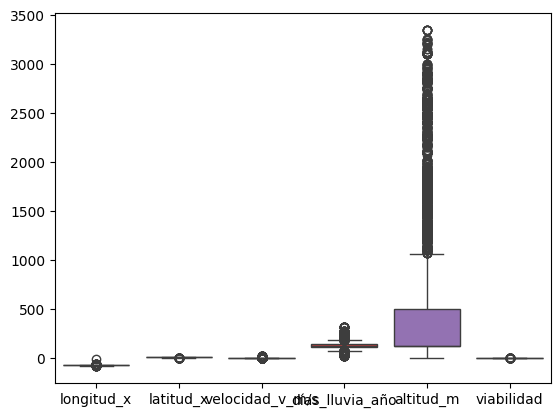

In [63]:
sns.boxplot(df_viabilidad)
plt.show()

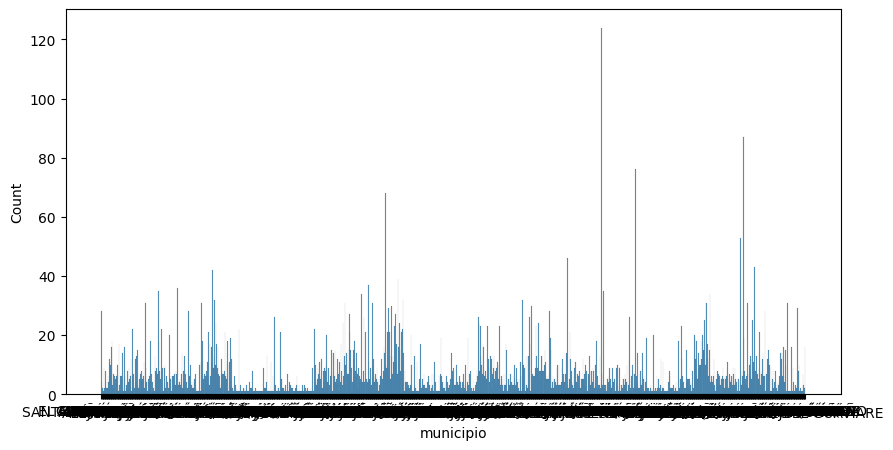

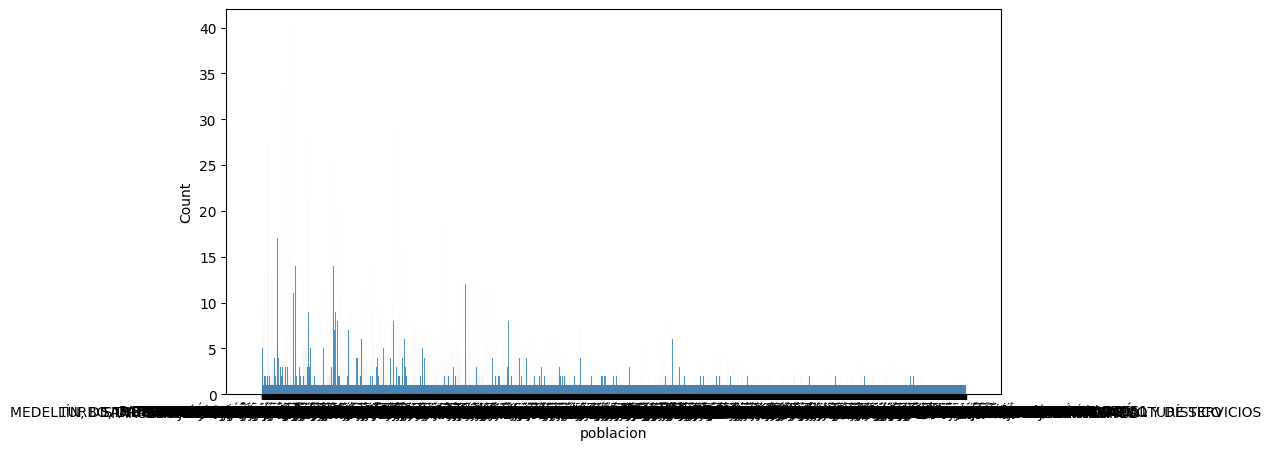

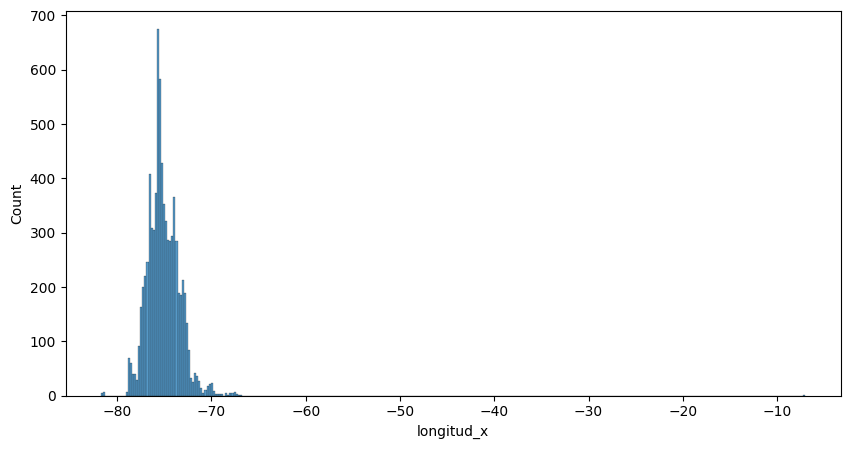

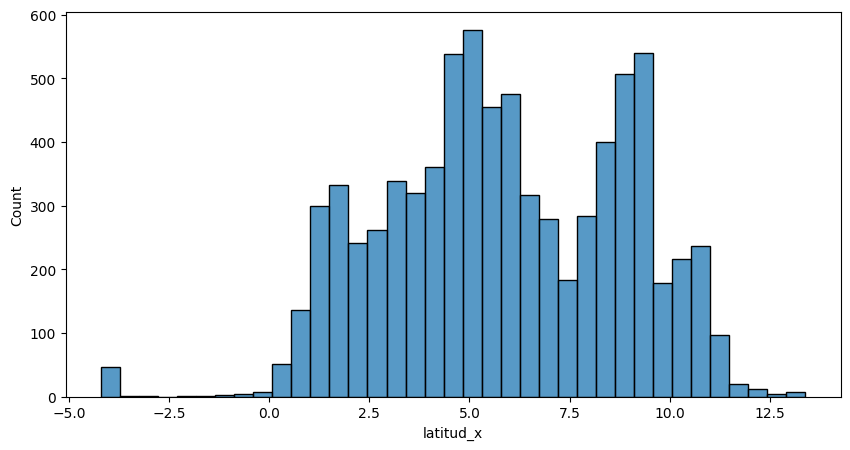

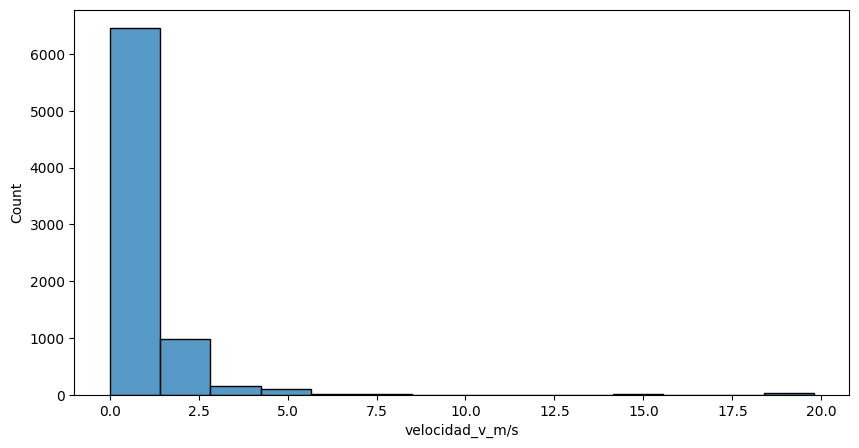

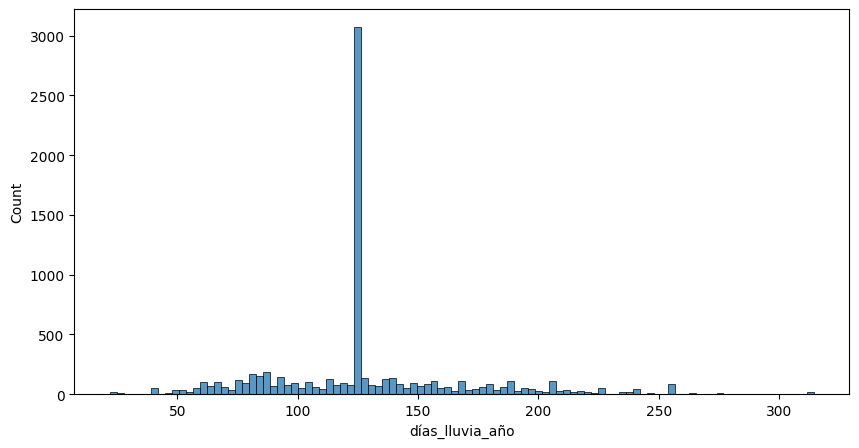

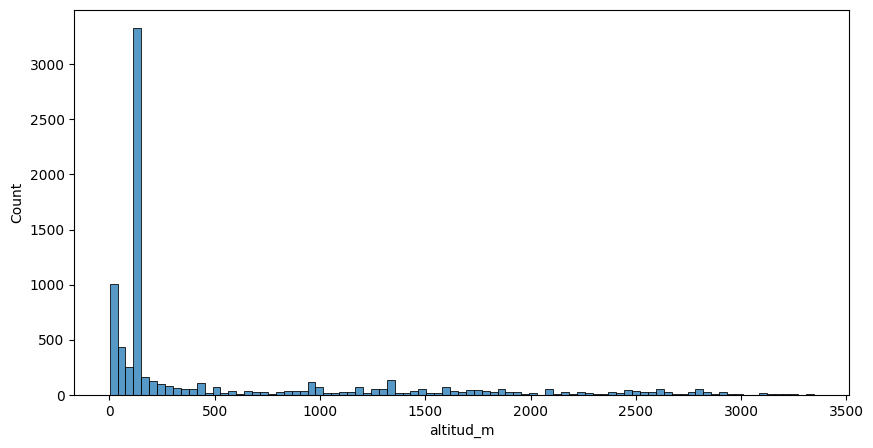

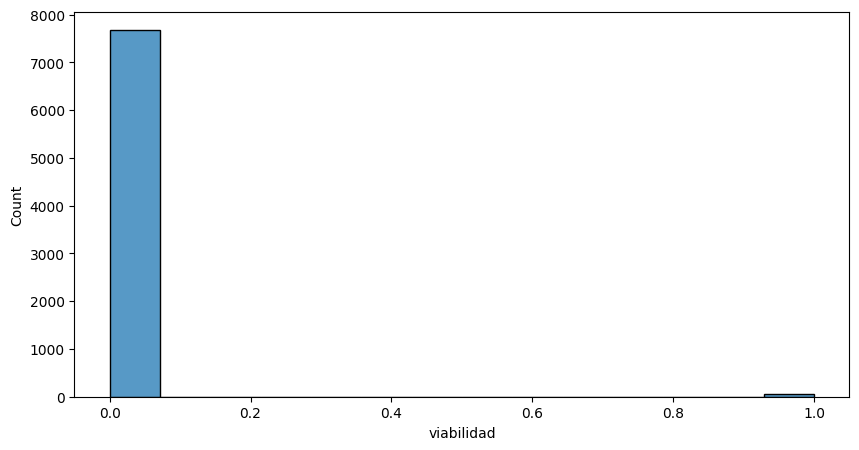

In [65]:
for col in df_viabilidad.columns:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_viabilidad[col])

In [79]:
# Definición de variables
# X = df_viabilidad[['velocidad_v_m/s', 'días_lluvia_año', 'altitud_m', 'latitud_x', 'longitud_x']]
X = df_viabilidad[['velocidad_v_m/s', 'días_lluvia_año', 'latitud_x', 'longitud_x']]
y = df_viabilidad['viabilidad']

In [91]:
# Dividir datos pruebas y entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [94]:
# Escalador
scaler_x = RobustScaler()
x_train_scl = scaler_x.fit_transform(x_train)
x_test_scl = scaler_x.transform(x_test)

scaler_y = RobustScaler()
y_train_scl = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scl = scaler_y.transform(y_test.values.reshape(-1, 1))

In [95]:
# Entrenamiento del Modelo
modelo_viabilidad = LogisticRegression()
modelo_viabilidad.fit(x_train_scl, y_train_scl)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [96]:
y_predict = modelo_viabilidad.predict(x_test_scl)

In [97]:
# Evaluación del Modelo
accuracy = accuracy_score(y_test_scl, y_predict)
confusion = confusion_matrix(y_test_scl, y_predict)
classification_rep = classification_report(y_test_scl, y_predict)

print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2300
         1.0       0.64      0.37      0.47        19

    accuracy                           0.99      2319
   macro avg       0.82      0.68      0.73      2319
weighted avg       0.99      0.99      0.99      2319



In [98]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.9931004743423889
Confusion Matrix:
[[2296    4]
 [  12    7]]


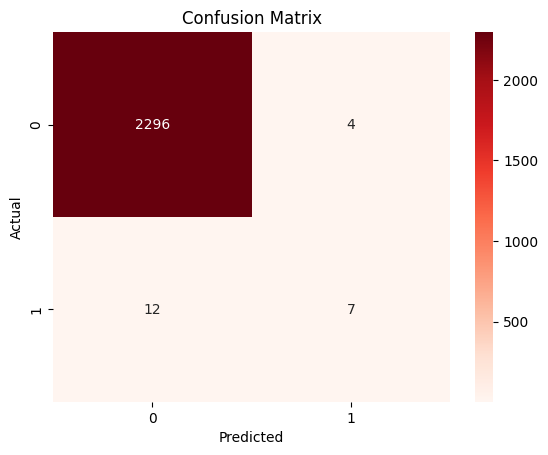

In [99]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()